## Captura e Visualização de dados

<b>Professor:</b> Diénert Vieira
<b>Telefone:</b> (83) 9 8182-1479
<b>Email:</b> dienertalencar@gmail.com

### Segunda avaliação de aprendizagem

Depois de extrairmos os dados bancários, passamos para a sua análise. Podemos detectar padrões de comportcamentos e gerar visualizações que nos auxiliem na tomada de decisões.

### Tarefa 03
#### Explorar os dados obtidos, gerar visualizações e obter insights

Primeiro importamos a biblioteca de manipulação de dados: Pandas. E usamos um alias (apelido): pd, por brevidade:

In [1]:
import pandas as pd

Depois podemos listar os arquivos do diretório:

In [20]:
import os
os.listdir("dados/")

['cartao', 'tudo.json', '.DS_Store', 'conta', 'tudo.csv']

Um dataframe é uma estrutura de dados tabular de duas dimensões (linhas e coluns). Um linha ou coluna consiste em uma série na biblioteca Pandas. A linha a seguir transforma o nosso arquivo gerado no exercício anterior em um dataframe, assim podemos executar operações sobre ele como em um banco de dados.

In [35]:
df = pd.read_json("dados/tudo.json")

Podemos visualizar o dataframe, apenas exibindo o valor da variável 'df', ou usando os métodos .head(n) para as primeiras 'n' linhas ou .tail(n) para as últimas 'n' linhas. Experimente cada um.

In [36]:
df.head()

,date,descricao,valor,referencia
0,2024-12-29,Sake Altiplano,-14.9,2024-12-30
1,2024-12-29,Posto Quality,-14.9,2024-12-30
2,2024-12-29,Artamilcealmeida,-142.0,2024-12-30
3,2024-12-27,Google One Ai Premium,-136.2,2024-12-30
4,2024-12-27,Comercialcasados,-76.0,2024-12-30


Para tratarmos as datas de forma apropriada, convertemos as strings para o formato apropriado. Acessamos uma coluna ou série, do dataframe usando .nome_da_coluna ou [nome_da_coluna]. Com isso podemos ver o tipo de cada coluna. Vemos que date já está no formato de data, mas a data de referência está como O de Object, ou seja, string.

In [23]:
df.date.dtype

dtype('<M8[ns]')

In [24]:
df.referencia.dtype

dtype('O')

Convertemos para data da seguinte forma:

In [25]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df['referencia'] = pd.to_datetime(df['referencia'], format='ISO8601')

Conferindo a conversão:

In [26]:
df.referencia.dtype

dtype('<M8[ns]')

Com isso, podemos por exemplo, ordenar todo o dataframe pela data.

Saber a data mínima:

In [27]:
df.date.min()

Timestamp('2024-12-02 00:00:00')

Saber a data máxima:

In [28]:
df.date.max()

Timestamp('2025-01-02 00:00:00')

Gerar um novo índice:

In [29]:
df.index = df.date

In [30]:
df = df.drop(columns='date')

In [31]:
df

,descricao,valor,referencia
date,,,
2024-12-29,Sake Altiplano,-14.90,2024-12-30
2024-12-29,Posto Quality,-14.90,2024-12-30
2024-12-29,Artamilcealmeida,-142.00,2024-12-30
2024-12-27,Google One Ai Premium,-136.20,2024-12-30
2024-12-27,Comercialcasados,-76.00,2024-12-30
...,...,...,...
2025-01-02,Transferência enviada pelo Pix - Dienert de Al...,-1553.00,2025-01-02
2025-01-02,Pagamento de fatura,-10041.16,2025-01-02
2025-01-02,Transferência enviada pelo Pix - DIENERT DE AL...,-1700.00,2025-01-02


In [32]:
df = df.sort_index()
df

,descricao,valor,referencia
date,,,
2024-12-02,Transferência Recebida - Maria Aparecida Neves...,1774.04,2024-12-31
2024-12-02,Transferência enviada pelo Pix - CHARLES LOPES...,-12.00,2024-12-31
2024-12-02,Transferência enviada pelo Pix - WALDECI JOSE ...,-2500.00,2024-12-31
2024-12-02,Transferência Recebida - Josirene Fernandes de...,44.00,2024-12-31
2024-12-02,Pagamento de fatura,-5.95,2024-12-31
...,...,...,...
2025-01-02,Transferência enviada pelo Pix - Dienert de Al...,-1553.00,2025-01-02
2025-01-02,Pagamento de fatura,-10041.16,2025-01-02
2025-01-02,Transferência enviada pelo Pix - DIENERT DE AL...,-1700.00,2025-01-02


In [37]:
df.to_csv('dados/tudo.csv')

In [34]:
df.descricao.map(len).max()

161

<Axes: >

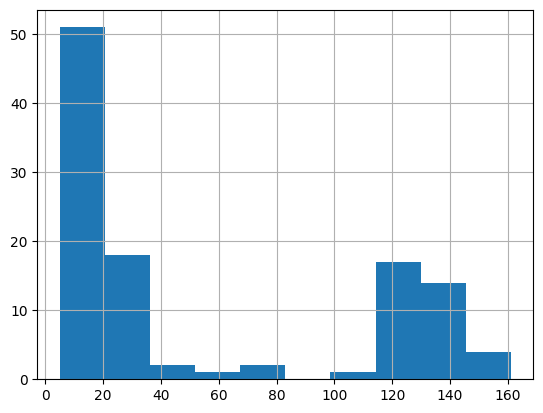

In [17]:
df.descricao.map(len).hist()

Podemos também usar a função 'filtra_e_soma' para encontrar algo específico contido na descrição, sem necessariamente informar toda a descrição

In [20]:
def filtra_e_soma(df, descricao):
    filtrado = df[df.descricao.str.lower().str.count(descricao) > 0]
    print('Soma: ', filtrado.valor.sum())
    return filtrado.copy()

In [22]:
spotify = filtra_e_soma(df, 'spotify')

Soma:  -69.8


In [23]:
spotify

,descricao,valor,referencia
date,,,
2024-12-03,Ebn *Spotify,-34.9,2024-12-30
2024-12-03,Ebn *Spotify,-34.9,2024-12-30


<Axes: >

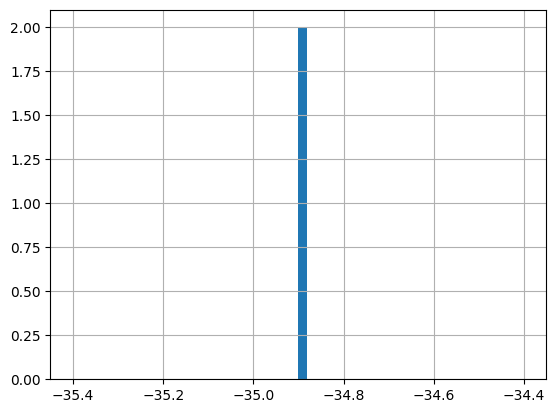

In [24]:
spotify.valor.hist(bins=50)

In [25]:
uber = filtra_e_soma(df, 'uber')

Soma:  -76.92


<Axes: >

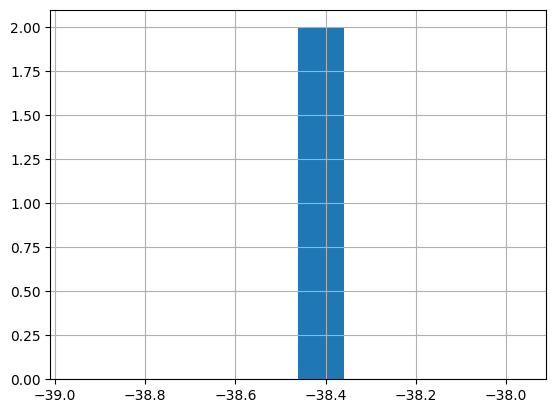

In [26]:
uber.valor.hist()

<Axes: >

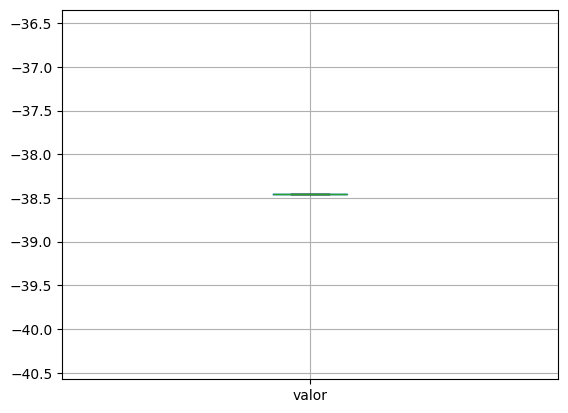

In [27]:
uber.boxplot()

In [28]:
uber

,descricao,valor,referencia
date,,,
2024-12-14,Uber* Trip,-38.46,2024-12-30
2024-12-14,Uber* Trip,-38.46,2024-12-30


In [29]:
def salva_serie(filtrado, inverte=True):
    filtrado_por_data = filtrado.groupby([filtrado.index.date]).valor.sum() * (-1 if inverte else 1) 
    filtrado_por_data = filtrado_por_data.to_frame()
    filtrado_por_data['day'] = filtrado_por_data.index
    filtrado_por_data.columns = ['count', 'day']
    filtrado_por_data.to_csv('../frontends/calendario_horizontal/dates.csv', index=False)
    return filtrado_por_data

In [30]:
salva_serie(uber)

OSError: Cannot save file into a non-existent directory: '../frontends/calendario_horizontal'

In [31]:
salva_serie(spotify)

OSError: Cannot save file into a non-existent directory: '../frontends/calendario_horizontal'

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [33]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

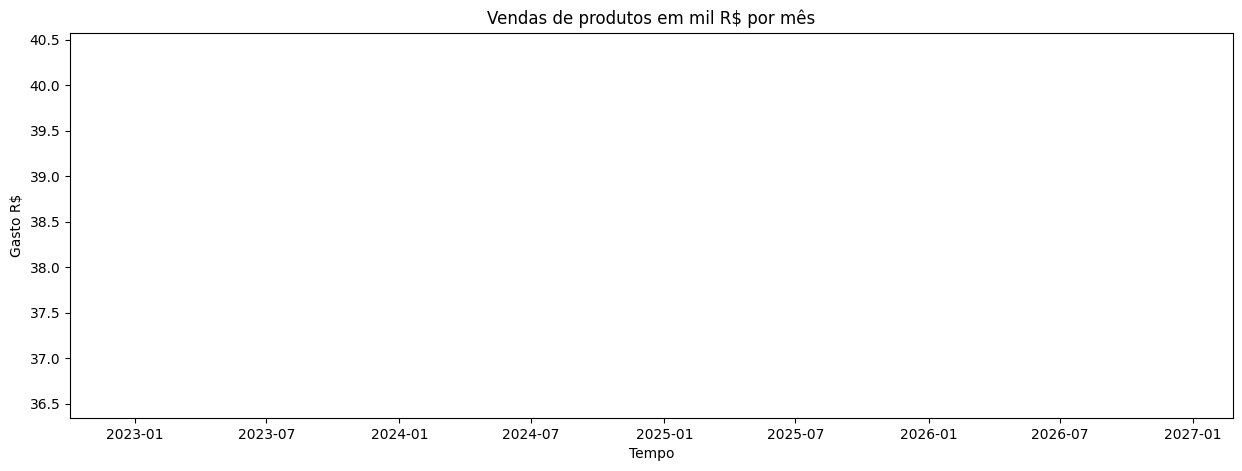

In [34]:
fig = plt.figure()
fig.set_size_inches(15, 5)
ax = plt.axes()
x = uber.index
y = uber.valor * -1
ax.set(title = "Vendas de produtos em mil R$ por mês", 
       xlabel='Tempo',
       ylabel='Gasto R$')
ax.plot(x, y);

In [29]:
uber.valor = -uber.valor

In [31]:
!pip install plotly

You should consider upgrading via the 'C:\Users\diene\anaconda3\envs\lab-tf2\python.exe -m pip install --upgrade pip' command.



Processing c:\users\diene\appdata\local\pip\cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c\retrying-1.3.3-cp37-none-any.whl


In [33]:
!pip install chart_studio

You should consider upgrading via the 'C:\Users\diene\anaconda3\envs\lab-tf2\python.exe -m pip install --upgrade pip' command.


In [34]:
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def plota_linha(x, y, titulo):
    plotly.offline.init_notebook_mode(connected=True)

    data = [go.Scatter(x=x, y=y, mode='lines+markers')]

    layout = dict(
        title=titulo,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all',
                         label='Tudo',)
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date',

        ),
        #barmode='stack'
    )

    fig = dict(data=data, layout=layout)

    plotly.offline.iplot(fig)

In [35]:
plota_linha(uber.index, uber.valor, 'Gasto com Uber')

In [36]:
def filtra_soma_plota(df, palavra, titulo, inverte=True):
    filtro = filtra_e_soma(df, palavra)
    plota_linha(filtro.index, filtro.valor*(-1 if inverte else 1), titulo)
    return filtro

In [37]:
filtra_soma_plota(df, 'posto', 'Gasto com abastecimentos')

Soma:  -234.17999999999998


,descricao,valor,referencia
date,,,
2021-02-10,AUTO POSTO 1 Cabedelo BR,-207.20,2021-03-10
2021-02-20,PAG*PostoJr JOAO PESSOA BR,-26.98,2021-03-10


In [38]:
proventos = filtra_soma_plota(df, 'provento', 'Ganho', inverte=False)

Soma:  26754.010000000002


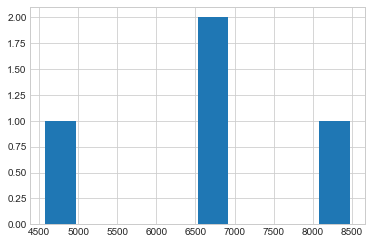

In [39]:
proventos.valor.hist()

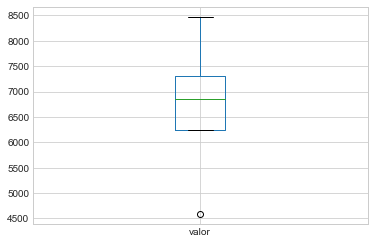

In [40]:
proventos.boxplot()

In [41]:
uber['valor'].sum()

172.82

In [42]:
iof = filtra_soma_plota(df, 'iof', 'IOF')

Soma:  -11.21


In [43]:
faturas = filtra_soma_plota(df, 'pgto', 'Faturas do Cartão de Crédito', inverte=False)

Soma:  14043.859999999999


In [44]:
df.descricao.str.lower().str.count('provento') == 0

date
2020-10-08    True
2020-12-15    True
2020-12-15    True
2020-12-15    True
2020-12-15    True
              ... 
2021-05-05    True
2021-05-06    True
2021-05-06    True
2021-05-10    True
2021-05-10    True
Name: descricao, Length: 236, dtype: bool

In [45]:
import numpy as np

In [46]:
faturas = df[df.descricao.str.lower().str.count('pgto') == 0].groupby('referencia')['valor'].sum()
faturas

referencia
2021-03-10   -4818.06
2021-03-31    2060.98
2021-04-10   -4237.66
2021-04-30    4884.66
2021-05-10   -8264.24
Name: valor, dtype: float64

In [47]:
plota_linha(faturas.index, faturas.values*-1, 'Gastos Totais')

In [48]:
df[df.descricao.str.lower().str.count('pgto').eq(0) & 
   df.referencia.eq(df.referencia.max()) &
  df.descricao.str.lower().str.count('123 viagens').eq(0) &
  df.descricao.str.lower().str.count('hostel').eq(0) ].valor.sum()

-8264.24

In [49]:
df[df.descricao.str.lower().str.count('123 viagens').gt(0)]

,descricao,valor,referencia
date,,,


In [50]:
  df[df.descricao.str.lower().str.count('hotel').gt(0)]

,descricao,valor,referencia
date,,,


In [51]:
  df[df.descricao.str.lower().str.count('hostel').gt(0)]

,descricao,valor,referencia
date,,,


In [52]:
df[df.descricao.str.lower().str.count('123 viagens').gt(0) |
  df.descricao.str.lower().str.count('salvador').gt(0)].valor.sum()

0.0

In [53]:
-2775.87 -5555.04

-8330.91

In [54]:
faturas = df[(df.descricao.str.lower().str.count('pgto') == 0) & (df.referencia == str(df.referencia.max()))]

In [55]:
faturas

,descricao,valor,referencia
date,,,
2020-12-15,ELITTE ACADEM PARC 05/12 Joao Pessoa BR,-69.90,2021-05-10
2020-12-15,ELITTE ACADEM PARC 05/12 Joao Pessoa BR,-20.00,2021-05-10
2020-12-15,MARIAH CONFEC PARC 05/05 JOAO PESSOA BR,-211.88,2021-05-10
2020-12-28,DUFRY LOJAS F PARC 04/05 RIO DE JANEIBR,-118.99,2021-05-10
2021-02-05,UTO CLUB HOND PARC 03/05 JOAO PESSOA BR,-159.95,2021-05-10
...,...,...,...
2021-05-05,Pagamento de Telefone - TIM SA,-75.99,2021-05-10
2021-05-06,PIX - Enviado - 06/05 12:25 Luciano Severo Da ...,-1000.00,2021-05-10
2021-05-06,Transferência Periódica - 06/05 1234 13182...,-451.18,2021-05-10


In [56]:
df[df.descricao.str.lower().str.count('proven') > 0]

,descricao,valor,referencia
date,,,
2021-03-01,Recebimento de Proventos - EMPRESA DE TECNOLOG...,6794.06,2021-03-31
2021-04-01,Recebimento de Proventos - EMPRESA DE TECNOLOG...,6905.46,2021-04-30
2021-04-01,Recebimento de Proventos - EMPRESA DE TECNOLOG...,4579.47,2021-04-30
2021-05-03,Recebimento de Proventos - EMPRESA DE TECNOLOG...,8475.02,2021-05-10


## Tarefa 03 Concluída